# library

In [1]:
import torch
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

In [2]:
torch.manual_seed(0)

In [3]:
seq_length = 7
data_dim = 5
hidden_dim = 10
output_dim = 1
learning_rate = 0.01
iterations = 500

In [4]:
def minmax_scaler(data):

    numerator = data - np.min(data,0)
    denominator = np.max(data, 0) - np.min(data, 0)

    return numerator/(denominator + 1e-7)

In [5]:
def build_dataset(time_series, seq_length):

    dataX = []
    dataY = []

    for i in range(0, len(time_series) - seq_length):

        _x = time_series[i:i+seq_length, :]
        _y = time_series[i+seq_length, [-1]]

        print(_x, '->', _y)

        dataX.append(_x)
        dataY.append(_y)

    return np.array(dataX), np.array(dataY)

# dataset(stock price)

In [6]:
xy = np.loadtxt('/content/data-02-stock_daily.csv', delimiter = ',')
xy = xy[::-1]

train_size = int(len(xy) * 0.7)
train_set = xy[0:train_size]
test_set = xy[train_size - seq_length:]

In [7]:
train_set = minmax_scaler(train_set)
test_set = minmax_scaler(test_set)

In [ ]:
trainX,trainY = build_dataset(train_set, seq_length)
testX,testY = build_dataset(test_set, seq_length)

In [9]:
trainX_tensor = torch.FloatTensor(trainX)
trainY_tensor = torch.FloatTensor(trainY)

testX_tensor = torch.FloatTensor(testX)
testY_tensor = torch.FloatTensor(testY)

# model

In [10]:
class Net(torch.nn.Module):

    def __init__(self, input_dim, hidden_dim, output_dim, layers):

        super(Net, self).__init__()
        self.rnn = torch.nn.LSTM(input_dim, hidden_dim, num_layers = layers, batch_first = True)
        self.fc = torch.nn.Linear(hidden_dim, output_dim, bias = True)

    def forward(self, x):

        x, _status = self.rnn(x)

        x = self.fc(x[:,-1])

        return x

In [11]:
net = Net(data_dim, hidden_dim, output_dim, 1)

# training

In [12]:
criterion = torch.nn.MSELoss()
optimizer = optim.Adam(net.parameters(), lr = learning_rate)

In [13]:
net.train()

for i in range(iterations):

    optimizer.zero_grad()

    outputs = net(trainX_tensor)

    loss = criterion(outputs, trainY_tensor)

    loss.backward()

    optimizer.step()

    print(i, loss.item())

0 0.2271038144826889
1 0.18340934813022614
2 0.15106436610221863
3 0.1261231154203415
4 0.10598734021186829
5 0.08915016800165176
6 0.07493706047534943
7 0.06327900290489197
8 0.05449602007865906
9 0.04902385175228119
10 0.04693441092967987
11 0.04731706157326698
12 0.04838263615965843
13 0.04839476943016052
14 0.04633765667676926
15 0.04207770526409149
16 0.03620168939232826
17 0.029662001878023148
18 0.023386556655168533
19 0.01801123283803463
20 0.01380065269768238
21 0.01071464829146862
22 0.008532215841114521
23 0.006976505275815725
24 0.005824481137096882
25 0.004987422376871109
26 0.0045247129164636135
27 0.004554683342576027
28 0.005089899525046349
29 0.005920968484133482
30 0.0066848923452198505
31 0.00707267364487052
32 0.006973988842219114
33 0.006471903529018164
34 0.005753519479185343
35 0.005014692898839712
36 0.0043952916748821735
37 0.003953743726015091
38 0.0036766387056559324
39 0.0035109836608171463
40 0.0034013083204627037
41 0.003315107664093375
42 0.00324889412149

# test

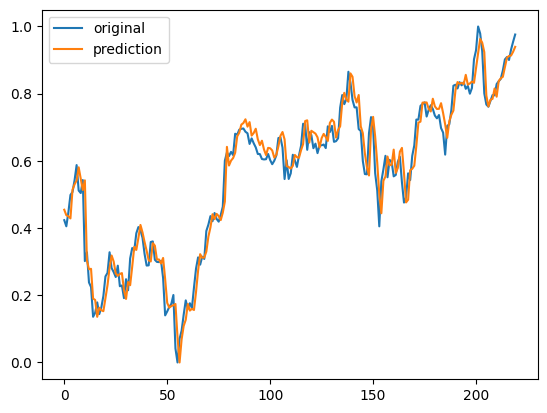

In [ ]:
plt.plot(testY)
plt.plot(net(testX_tensor).data.numpy())
plt.legend(['original','prediction'])
plt.show()

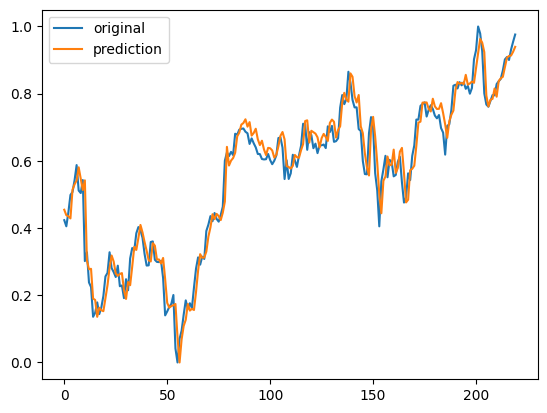

In [14]:
net.eval()

plt.plot(testY)
plt.plot(net(testX_tensor).data.numpy())
plt.legend(['original','prediction'])
plt.show()